In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [226]:
from sklearn.datasets import load_boston

In [227]:
boston_data = load_boston()

In [228]:
data = pd.DataFrame(data=boston_data['data'], columns=boston_data['feature_names'])

In [229]:
X = data['LSTAT']
y = pd.DataFrame(boston_data['target'], columns=['Price in $1000s'])

In [230]:
X = np.reshape(X.values,(-1,1))
y = np.reshape(y.values,(-1,1))

In [231]:
from sklearn.preprocessing import PolynomialFeatures

In [232]:
poly = PolynomialFeatures(interaction_only=False, degree=3)

In [233]:
Xpoly = poly.fit_transform(X)

In [234]:
Xpoly = pd.DataFrame(Xpoly,columns=['1', 'X', 'X^2', 'X^3'])

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
X_train, X_test, y_train, y_test = train_test_split(Xpoly, y, test_size=0.3, random_state=101)

In [237]:
from sklearn.linear_model import LinearRegression

In [238]:
lm = LinearRegression()

In [239]:
lm.fit(X_train,y_train)

LinearRegression()

In [240]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Single Variable Polynomial Regression')

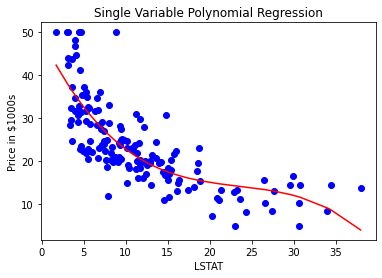

In [242]:
plt.figure()
plt.scatter(X_test['X'], y_test, color = "b")
plt.plot(sorted(X_test['X']), sorted(predictions, reverse=True), color = "r")
plt.xlabel('LSTAT')
plt.ylabel('Price in $1000s')
plt.title('Single Variable Polynomial Regression')